![](http://www.kiplinger.com/kipimages/pages/14024.jpg)

# An Extensive Medicare Data Exploration - Healthcare Analysis

## About Medicare 

In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. United States Medicare is funded by a payroll tax, premiums and surtaxes from beneficiaries, and general revenue. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. It also provides health insurance to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis.

In 2015, Medicare provided health insurance for over **55 million** (46 million people age 65 and older and 9 million younger people). On average, Medicare covers about half of the health care charges for those enrolled. The enrollees must then cover their remaining costs either with supplemental insurance, separate insurance, or out-of-pocket. Out-of-pocket costs can vary depending on the amount of health care a Medicare enrollee needs. 

## About CMS

The Centers for Medicare & Medicaid Services (CMS), previously known as the Health Care Financing Administration (HCFA), is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. In addition to these programs, CMS has other responsibilities, including the administrative simplification standards from the Health Insurance Portability and Accountability Act of 1996 (HIPAA), quality standards in long-term care facilities (more commonly referred to as nursing homes) through its survey and certification process, clinical laboratory quality standards under the Clinical Laboratory Improvement Amendments, and oversight of HealthCare.gov.

## About the Data-Set

This [public dataset](https://www.kaggle.com/cms/cms-medicare) was created by the Centers for Medicare & Medicaid Services. The data summarizes the utilization and payments for procedures, services, and prescription drugs provided to Medicare beneficiaries by specific inpatient and outpatient hospitals, physicians, and other suppliers. The dataset includes the following data: Common inpatient and outpatient services, All physician and other supplier procedures and services, All Part D prescriptions. Providers determine what they will charge for items, services, and procedures provided to patients and these charges are the amount that providers bill for an item, service, or procedure.



## Contents

1. Multiple Regression

&nbsp;&nbsp;&nbsp;&nbsp;  1.1 Model fitting

&nbsp;&nbsp;&nbsp;&nbsp;  1.2 Model interpretation
  





In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

import statsmodels.formula.api as smf

In [6]:
nursingFacilities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/nursing_facilities_2014.csv')

In [7]:
nursingFacilities.head()

,Unnamed: 0,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,0,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,48187,1104,829,25.1,...,40.0,51.0,47.0,70.0,NaN,68.0,20.0,69.0,10.0,17
1,1,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,22033,436,350,26.3,...,29.0,43.0,46.0,72.0,NaN,54.0,17.0,53.0,11.0,19
2,2,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,22207,353,289,23.1,...,34.0,49.0,49.0,67.0,NaN,50.0,14.0,47.0,24.0,19
3,3,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,2446,368,297,19.5,...,16.0,55.0,46.0,68.0,NaN,45.0,25.0,65.0,15.0,12
4,4,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,48322,871,697,27.2,...,29.0,50.0,49.0,74.0,NaN,67.0,23.0,70.0,10.0,17


# 1. Multiple Regression

In [8]:
reg = smf.ols(formula='total_snf_medicare_payment_amount ~ total_stays+average_hcc_score+average_length_of_stays_days', data=nursingFacilities)

In [9]:
results=reg.fit()

In [10]:
# Inspect the results
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.894
Model:                                           OLS   Adj. R-squared:                  0.894
Method:                                Least Squares   F-statistic:                 4.236e+04
Date:                               Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                                       16:55:28   Log-Likelihood:            -2.2096e+05
No. Observations:                              15026   AIC:                         4.419e+05
Df Residuals:                                  15022   BIC:                         4.419e+05
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                   coef    std err          

## Based on the previous we have fitted the following model:

 $total\_snf\_medicare\_payment\_amount=-1.682*10^6+1.149*10^4*total\_stays+1.231*10^5*average\_hcc\_score+4.58*10^4*average\_length\_of\_stays\_days+u $



## How do we interpret the equation?



#### If the total stays increases by one unit, total medicare payment is predicted to change by about 11490 dollars. This means that, on average, each inpatient costs 11490 dollars (controlling for other factors).

#### If the average_hcc_score increases by one unit, total medicare payment is predicted to change by about 123100 dollars. 

#### If the average lenght of stays increases by one unit, total medicare payment is predicted to change by about 45800 dollars. This means that, on average, each day of hospitalization costs 45800 dollars (controlling for other factors).


In [11]:
results.rsquared

0.8942916992646643

### This is not a bad model, it is able to  explain 89% of the total variation in medicare payments
### Conversely, the current model leaves 11%% of the variation unexplained.


# Second Simple Regression

<Axes: xlabel='average_hcc_score', ylabel='total_snf_medicare_payment_amount'>

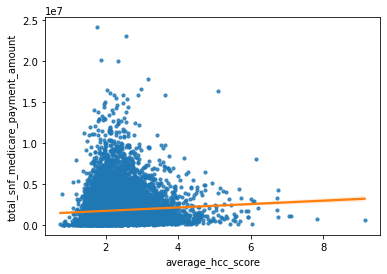

In [12]:
sns.regplot(data=nursingFacilities,y='total_snf_medicare_payment_amount',x='average_hcc_score',order=1,scatter_kws={"s": 10},line_kws={"color": "C1"})

In [13]:
reg = smf.ols(formula='total_snf_medicare_payment_amount ~ average_hcc_score', data=nursingFacilities)

In [14]:
results=reg.fit()

In [15]:
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     total_snf_medicare_payment_amount   R-squared:                       0.005
Model:                                           OLS   Adj. R-squared:                  0.004
Method:                                Least Squares   F-statistic:                     68.24
Date:                               Mon, 20 Mar 2023   Prob (F-statistic):           1.57e-16
Time:                                       16:55:30   Log-Likelihood:            -2.3780e+05
No. Observations:                              15026   AIC:                         4.756e+05
Df Residuals:                                  15024   BIC:                         4.756e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [16]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept            1.321264e+06
average_hcc_score    2.072304e+05
dtype: float64



## Based on the previous we have fitted the following model:

 total_snf_medicare_payment_amount=-6.04E4+2.51E4*average_hcc_score+u 



## How do we interpret the equation?



In [17]:
results.rsquared

0.004521268385520694

### The factor average_hcc_score is statistically significant.
### The model is however not very useful, it only explains 0.004% of the total variance in medicare payments.